In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.ndimage import gaussian_filter1d
import sys
sys.path.append('../')
from package_global_functions import *

import matplotlib
import copy

extSSDpath = getExternalSSDpath()
if os.path.exists(extSSDpath):
    path = extSSDpath + getProjectFoldername() + '/stationary_distributions/data'
    if not os.path.exists(path):
        call(f'mkdir -p {path}', shell=True)
else:
    path = '/data'

In [10]:
N = 500
pi1, pi2, q1, q2, l = 0.3, 0.3, 7, 10, 0.6
data = pd.read_csv(f'{path}/stat_data_N_{N}_pi1_{pi1}_pi2_{pi2}_q1_{q1}_q2_{q2}_l_{l}.csv')

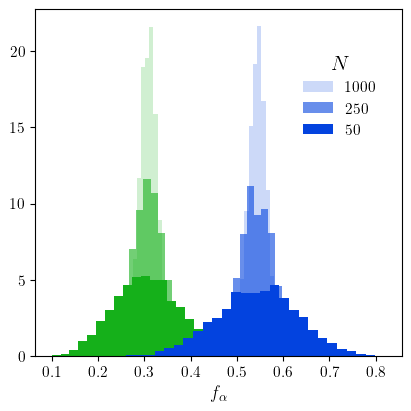

In [3]:
latexFont(titlesize=11, ticklabelssize=11, labelsize=13)
fig, ax = plt.subplots(figsize=(4,4), constrained_layout=True)
ax.set_xlabel(r'$f_{\alpha}$')
pi1, pi2, q1, q2, l = 0.3, 0.3, 7.0, 10.0, 0.3
bins_N = {2500:20, 1000:15, 500:15, 250:16, 100:18, 50:27}
# for i,N in enumerate([50, 500, 1000]):
# for i,N in enumerate([1000, 500, 50]):
for i,N in enumerate([1000, 250, 50]):
    if os.path.exists(f'{path}/stat_data_N_{N}_pi1_{pi1}_pi2_{pi2}_q1_{q1}_q2_{q2}_l_{l}.csv'):
        data = pd.read_csv(f'{path}/stat_data_N_{N}_pi1_{pi1}_pi2_{pi2}_q1_{q1}_q2_{q2}_l_{l}.csv')
    else:
        data = pd.read_csv(f'{path}/stat_data_N_{N}_pi1_{pi1}_pi2_{pi2}_q1_{float(q1)}_q2_{float(q2)}_l_{l}.csv')
    x = i*0.4
    # ax.hist(data['f0'], bins=bins_N[N], density=True, rwidth=1.0, color='xkcd:red', alpha=1.0-x)
    # if N==50 or N==500:
    #     ax.hist(data['f1'], bins=bins_N[N]-1, density=True, rwidth=1.0, color='xkcd:green', alpha=0.2+x) # alpha=0.4+x
    # else:
    #     ax.hist(data['f1'], bins=bins_N[N], density=True, rwidth=1.0, color='xkcd:green', alpha=0.2+x) # alpha=0.4+x
    # on increasing N:
    # ax.hist(data['f1'], bins=bins_N[N]-1, density=True, rwidth=1.0, color='xkcd:green', alpha=1.0-x)
    # ax.hist(data['f2'], bins=bins_N[N], density=True, rwidth=1.0, color='xkcd:blue', alpha=1.0-x, label=f'{N}')
    # on decreasing N:
    # ax.hist(data['f1'], bins=bins_N[N]-1, density=True, rwidth=1.0, color='xkcd:green', alpha=0.2+x)
    # ax.hist(data['f2'], bins=bins_N[N], density=True, rwidth=1.0, color='xkcd:blue', alpha=0.2+x, label=f'{N}')
    ax.hist(data['f1'], bins=bins_N[N]-1, density=True, rwidth=1.0, color='xkcd:green', histtype='stepfilled', alpha=0.2+x)
    ax.hist(data['f2'], bins=bins_N[N], density=True, rwidth=1.0, color='xkcd:blue', histtype='stepfilled', alpha=0.2+x, label=f'{N}')
fig.legend(title='$N$', fontsize=11, frameon=False, loc=(0.72, 0.65))
# fig.savefig(f'stat_fs_ditr_varN_pi1_{pi1}_pi2_{pi2}_q1_{q1}_q2_{q2}_l_{l}.pdf')

(0.08, 0.82)

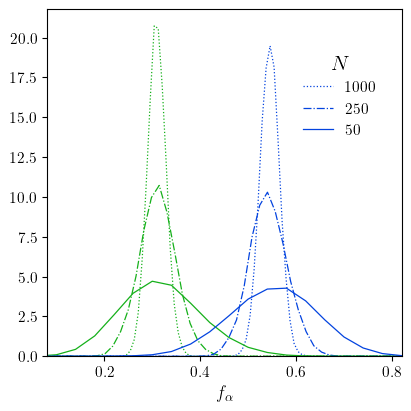

In [42]:
latexFont(titlesize=11, ticklabelssize=11, labelsize=13)
fig, ax = plt.subplots(figsize=(4,4), constrained_layout=True)
ax.set_xlabel(r'$f_{\alpha}$')
pi1, pi2, q1, q2, l = 0.3, 0.3, 7.0, 10.0, 0.3
bins_N = {2500:20, 1000:15, 500:15, 250:16, 100:18, 50:27}
bins_N_r01 = {1000:120, 250:62, 50:25}
ls_N = {1000:':', 250:'-.', 50:'-'}
sig = 0.75
for i,N in enumerate([1000, 250, 50]):
    if os.path.exists(f'{path}/stat_data_N_{N}_pi1_{pi1}_pi2_{pi2}_q1_{q1}_q2_{q2}_l_{l}.csv'):
        data = pd.read_csv(f'{path}/stat_data_N_{N}_pi1_{pi1}_pi2_{pi2}_q1_{q1}_q2_{q2}_l_{l}.csv')
    else:
        data = pd.read_csv(f'{path}/stat_data_N_{N}_pi1_{pi1}_pi2_{pi2}_q1_{float(q1)}_q2_{float(q2)}_l_{l}.csv')
    x = i*0.4
    # using the bins dictionary and not controlling the range:
    # hist, bin_edges = np.histogram(data['f1'], bins_N[N]-1, density=True)
    # bin_centers = (bin_edges[1:]+bin_edges[:-1])/2
    # hist_gf = gaussian_filter1d(hist, sig)
    # ax.plot(bin_centers, hist_gf, color='xkcd:green', lw=0.9, ls=ls_N[N])
    # hist, bin_edges = np.histogram(data['f2'], bins_N[N], density=True)
    # bin_centers = (bin_edges[1:]+bin_edges[:-1])/2
    # hist_gf = gaussian_filter1d(hist, sig)
    # ax.plot(bin_centers, hist_gf, color='xkcd:blue', lw=0.9, ls=ls_N[N], label=f'{N}')
    # range (0,1)
    hist, bin_edges = np.histogram(data['f1'], bins_N_r01[N], range=(0.0,1.0), density=True)
    bin_centers = (bin_edges[1:]+bin_edges[:-1])/2
    hist_gf = gaussian_filter1d(hist, sig)
    ax.plot(bin_centers, hist_gf, color='xkcd:green', lw=0.9, ls=ls_N[N])
    hist, bin_edges = np.histogram(data['f2'], bins_N_r01[N], range=(0.0,1.0), density=True)
    bin_centers = (bin_edges[1:]+bin_edges[:-1])/2
    hist_gf = gaussian_filter1d(hist, sig)
    ax.plot(bin_centers, hist_gf, color='xkcd:blue', lw=0.9, ls=ls_N[N], label=f'{N}')
fig.legend(title='$N$', fontsize=11, frameon=False, loc=(0.72, 0.65))
ax.set_ylim(0,None)
ax.set_xlim(0.08, 0.82)

In [4]:
len(data)

4200

### Combined plot with the sdf2 state space

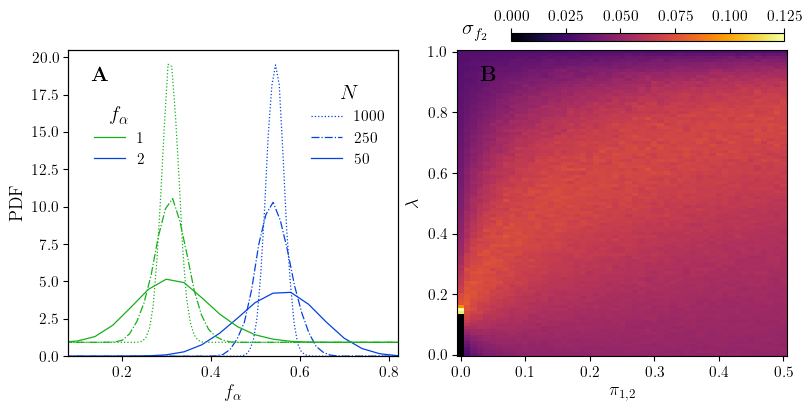

In [62]:
latexFont(titlesize=11, ticklabelssize=11, labelsize=13)
fig, ax = plt.subplots(1,2,figsize=(8, 4), constrained_layout=True)

###########################################################################3
# left: stat distr for different system sizes
if os.path.exists(extSSDpath):
    path = extSSDpath + getProjectFoldername() + '/stationary_distributions/data'
    if not os.path.exists(path):
        call(f'mkdir -p {path}', shell=True)
else:
    path = '/data'

ax[0].set_xlabel(r'$f_{\alpha}$')
ax[0].set_ylabel(r'PDF')
ax[0].set_xlim(0.08, 0.82)
pi1, pi2, q1, q2, l = 0.3, 0.3, 7.0, 10.0, 0.3
bins_N = {2500:20, 1000:15, 500:15, 250:16, 50:27}
bins_N_r01 = {1000:120, 250:62, 50:25}
ls_N = {1000:':', 250:'-.', 50:'-'}
sig = 0.75
lns = []
ax2 = ax[0].twinx()
for i,N in enumerate([1000, 250, 50]):
    data = pd.read_csv(f'{path}/stat_data_N_{N}_pi1_{pi1}_pi2_{pi2}_q1_{q1}_q2_{q2}_l_{l}.csv')
    x = i*0.4
    # ax[0].hist(data['f1'], bins=bins_N[N]-1, density=True, rwidth=1.0, color='xkcd:green', alpha=0.2+x)
    # ax[0].hist(data['f2'], bins=bins_N[N], density=True, rwidth=1.0, color='xkcd:blue', alpha=0.2+x, label=f'{N}')
    hist, bin_edges = np.histogram(data['f1'], bins_N_r01[N], range=(0.0,1.0), density=True)
    bin_centers = (bin_edges[1:]+bin_edges[:-1])/2
    hist_gf = gaussian_filter1d(hist, sig)
    ln, = ax2.plot(bin_centers, hist_gf, color='xkcd:green', lw=0.9, ls=ls_N[N])
    lns.append(ln)
    hist, bin_edges = np.histogram(data['f2'], bins_N_r01[N], range=(0.0,1.0), density=True)
    bin_centers = (bin_edges[1:]+bin_edges[:-1])/2
    hist_gf = gaussian_filter1d(hist, sig)
    ln, = ax[0].plot(bin_centers, hist_gf, color='xkcd:blue', lw=0.9, ls=ls_N[N], label=f'{N}')
    lns.append(ln)
# ax[0].legend(title='$N$', fontsize=11, frameon=False, loc=(0.72, 0.65))
lnsN = [lns[1], lns[3], lns[5]]
lnsf = [lns[4], lns[5]]
labelsN = [ln.get_label() for ln in lnsN]
labelsf = ['1', '2']
ax2.get_yaxis().set_visible(False)
ax[0].legend(lnsN, labelsN, title='$N$', fontsize=11, frameon=False, loc=(0.72, 0.6))
# ax[0].legend(lnsf, labelsf, title=r'$f_{\alpha}$', fontsize=11, frameon=False, loc=(0.08, 0.65))
ax2.legend(lnsf, labelsf, title=r'$f_{\alpha}$', fontsize=11, frameon=False, loc=(0.06, 0.6))
ax[0].set_ylim(0,None)


###########################################################################3
# right: state space

if os.path.exists(extSSDpath):
    path = extSSDpath + getProjectFoldername() + '/sim_phase_space/symmetric/results'
    tline_path = extSSDpath + getProjectFoldername() + '/det_sols_from_polynomial/res_files'
else:
    print('CAREFUL! NO EXTERNAL SSD!')
    path = './results'
    tline_path = '../../det_sols_from_polynomial/res_files'

model = 'Galla'
q1, q2, ic, N = 7.0, 10.0, 'N', 100
mesh_file = f'q1_{q1}_q2_{q2}_phase_space_{model}_ic_{ic}_Nbots_{N}.npz'
mesh = np.load(f'{path}/{mesh_file}')

ax[1].set(xlim=(-0.005, 0.505), ylim=(-0.005, 1.005), xlabel='$\pi_{1,2}$', ylabel='$\lambda$')
# ax[1].text(0.05, 1.03, '$\sigma_{f_2}$', transform=ax[1].transAxes)
fig.text(0.57, 0.925, '$\sigma_{f_2}$')

z = mesh['fs'][5]
vmin = np.min(z)
vmax = 0.125 # it is in fact 0.13...
cmap = copy.copy(matplotlib.colormaps['inferno'])
cmap.set_bad(cmap.colors[0])
im = ax[1].pcolormesh(mesh['x'], mesh['y'], z, cmap=cmap, shading='nearest', vmin=vmin, vmax=vmax, rasterized=True)
fig.colorbar(im, ax=ax[1], location='top', fraction=0.05, aspect=35, pad=0.02, shrink=0.83, anchor=(0.96, 1.0))

ax[0].text(0.07,0.9, r'$\textbf{A}$', transform=ax[0].transAxes)
ax[1].text(0.07,0.9, r'$\textbf{B}$', transform=ax[1].transAxes)

fig.savefig('finite_size_effects_multiplot.pdf')

In [52]:
labelsN

['1000', '250', '50']

(array([ 0.32142857,  0.46428571,  1.32142857,  3.03571429,  3.67857143,
         5.25      ,  9.60714286,  9.82142857, 10.39285714, 10.82142857,
         7.07142857,  5.82142857,  3.32142857,  2.07142857,  1.10714286,
         0.57142857,  0.28571429,  0.03571429]),
 array([0.432     , 0.44533333, 0.45866667, 0.472     , 0.48533333,
        0.49866667, 0.512     , 0.52533333, 0.53866667, 0.552     ,
        0.56533333, 0.57866667, 0.592     , 0.60533333, 0.61866667,
        0.632     , 0.64533333, 0.65866667, 0.672     ]),
 <BarContainer object of 18 artists>)

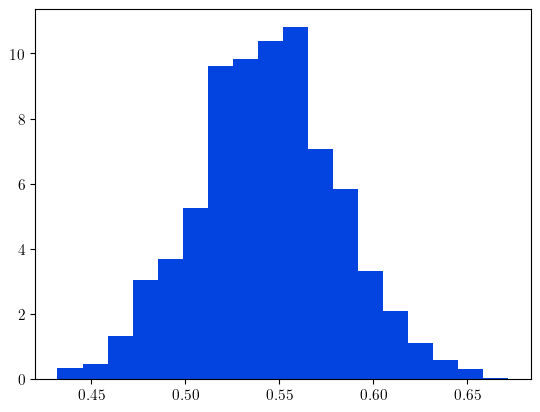

In [16]:
fig, ax = plt.subplots()
N = 250
pi1, pi2, l = 0.3, 0.3, 0.3
# q1, q2 = 7, 10
# data = pd.read_csv(f'{path}/stat_data_N_{N}_pi1_{pi1}_pi2_{pi2}_q1_{q1}_q2_{q2}_l_{l}.csv')
# ax.hist(data['f2'], density=True, rwidth=1.0, color='xkcd:blue', alpha=0.8)
q1, q2 = 7.0, 10.0
data = pd.read_csv(f'{path}/stat_data_N_{N}_pi1_{pi1}_pi2_{pi2}_q1_{q1}_q2_{q2}_l_{l}.csv')
ax.hist(data['f2'], bins=18, density=True, rwidth=1.0, color='xkcd:blue')

In [12]:
len(data['f2'])

2100